In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import sys

sys.path.append('/content/drive/My Drive/Msc. Project Files/BoundCNN/')


In [ ]:
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd
import sklearn



import keras
from keras import layers
from tensorflow.keras import regularizers
from keras.models import Model

from keras.layers import Dense, Activation, Dropout, Flatten, Input
from keras.optimizers import Adam
from keras.layers import Conv1D, MaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler
import time
from scipy.io import loadmat




from tensorflow.python.client import device_lib
import tensorflow as tf
tf.test.gpu_device_name()
print(device_lib.list_local_devices())


In [ ]:

x1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/1-translocsimu-tsr_m=0.01-Unbound_1.mat')
x2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/2-translocsimu-tsr_m=0.01-Unbound_1.mat')
x3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/3-translocsimu-tsr_m=0.01-Unbound_1.mat')
x4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/4-translocsimu-tsr_m=0.01-Unbound_1.mat')
x5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/5-translocsimu-tsr_m=0.01-Unbound_1.mat')
x6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/6-translocsimu-tsr_m=0.01-Unbound_1.mat')
x7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/7-translocsimu-tsr_m=0.01-Unbound_1.mat')
x8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/8-translocsimu-tsr_m=0.01-Unbound_1.mat')
x9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/9-translocsimu-tsr_m=0.01-Unbound_1.mat')
x10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.01-Unbound/10-translocsimu-tsr_m=0.01-Unbound_1.mat')




y1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/1-translocsimu-tsr_m=0.08-Bound_1.mat')
y2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/2-translocsimu-tsr_m=0.08-Bound_1.mat')
y3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/3-translocsimu-tsr_m=0.08-Bound_1.mat')
y4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/4-translocsimu-tsr_m=0.08-Bound_1.mat')
y5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/5-translocsimu-tsr_m=0.08-Bound_1.mat')
y6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/6-translocsimu-tsr_m=0.08-Bound_1.mat')
y7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/7-translocsimu-tsr_m=0.08-Bound_1.mat')
y8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/8-translocsimu-tsr_m=0.08-Bound_1.mat')
y9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/9-translocsimu-tsr_m=0.08-Bound_1.mat')
y10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/0.08/10-translocsimu-tsr_m=0.08-Bound_1.mat')



In [ ]:

x1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/1-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/2-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/3-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/4-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/5-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/6-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/7-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/8-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/9-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')
x10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/6e-11/10-translocsimu-tsr_m=0.01-Is_m=6e-11-Bound_1.mat')

y1 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/1-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y2 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/2-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y3 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/3-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y4 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/4-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y5 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/5-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y6 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/6-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y7 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/7-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y8 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/8-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y9 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/9-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')
y10 = loadmat('/content/drive/My Drive/Msc. Project Files/BoundCNN/data/Is_m/15e-11/10-translocsimu-tsr_m=0.01-Is_m=15e-11-Bound_1.mat')




In [ ]:
ch2_Unbound1 = x1['ch2']
ch2_Unbound2 = x2['ch2']
ch2_Unbound3 = x3['ch2']
ch2_Unbound4 = x4['ch2']
ch2_Unbound5 = x5['ch2']
ch2_Unbound6 = x6['ch2']
ch2_Unbound7 = x7['ch2']
ch2_Unbound8 = x8['ch2']
ch2_Unbound9 = x9['ch2']
ch2_Unbound10 = x10['ch2']

ch2_Bound1 = y1['ch2']
ch2_Bound2 = y2['ch2']
ch2_Bound3 = y3['ch2']
ch2_Bound4 = y4['ch2']
ch2_Bound5 = y5['ch2']
ch2_Bound6 = y6['ch2']
ch2_Bound7 = y7['ch2']
ch2_Bound8 = y8['ch2']
ch2_Bound9 = y9['ch2']
ch2_Bound10 = y10['ch2']


In [ ]:
ch2_Unbound = np.concatenate((ch2_Unbound1, ch2_Unbound2, ch2_Unbound3, ch2_Unbound4, ch2_Unbound5, ch2_Unbound6, ch2_Unbound7, ch2_Unbound8, ch2_Unbound9, ch2_Unbound10), axis=0)

In [ ]:
ch2_Bound = np.concatenate((ch2_Bound1, ch2_Bound2, ch2_Bound3, ch2_Bound4, ch2_Bound5, ch2_Bound6, ch2_Bound7, ch2_Bound8, ch2_Bound9, ch2_Bound10), axis=0)

In [ ]:
print(len(ch2_Unbound))
print(len(ch2_Bound))


100000000
100000000


In [ ]:
ch2_Bound = ch2_Bound[ch2_Bound[:] > 0.5*pow(10, -10)] 

In [ ]:
ch2_Unbound = ch2_Unbound[ch2_Unbound[:] > 0.5*pow(10, -10)] 

In [ ]:
# Hyperparameters

hp = {
    "traceLength" : 1100, 
}



In [ ]:
print(len(ch2_Bound))
print(len(ch2_Unbound))

991371
991371


In [ ]:
ch2_Bound = ch2_Bound[:len(ch2_Bound)-(len(ch2_Bound)%hp["traceLength"])]
ch2_Bound = ch2_Bound.reshape(-1,hp["traceLength"])
ch2_Unbound = ch2_Unbound[:len(ch2_Unbound)-(len(ch2_Unbound)%hp["traceLength"])]
ch2_Unbound = ch2_Unbound.reshape(-1,hp["traceLength"])



In [ ]:
TotalDatas = np.concatenate((ch2_Bound, ch2_Unbound), axis=0)

In [ ]:
len(TotalDatas)

1802

In [ ]:
y_total00 = np.zeros((len(ch2_Unbound),1))   
y_total11 = np.ones((len(ch2_Bound),1))  
y_total10 = np.concatenate((y_total11, y_total00), axis=0)


In [ ]:

from sklearn.model_selection import train_test_split
X_train_1, X_test, Y_train_1, Y_test = train_test_split(TotalDatas, y_total10, test_size=0.2) #, random_state=1
X_train, X_val, Y_train, Y_val   = train_test_split(X_train_1, Y_train_1, test_size=0.25) # 0.25 x 0.8 = 0.2




In [ ]:
X_train -= np.mean(X_train, axis= 0)
X_train /= np.std(X_train, axis = 0)
X_val -= np.mean(X_val, axis= 0)
X_val /= np.std(X_val, axis = 0)
X_test -= np.mean(X_test, axis= 0)
X_test /= np.std(X_test, axis = 0)

In [ ]:
print(len(X_train))
print(len(X_val))
print(len(X_test))
print(len(Y_train))
print(len(Y_val))
print(len(Y_test))

1080
361
361
1080
361
361


In [ ]:
Y_train_bound = np.where(Y_train == 0, False, True)
Y_val_bound = np.where(Y_val == 0, False, True)
Y_test_bound = np.where(Y_test == 0, False, True)

In [ ]:
# weights

from sklearn.utils import class_weight

labels = np.array([True, False])

weights = class_weight.compute_class_weight('balanced', labels, Y_train_bound.reshape(-1))


pd.DataFrame({
    "Train": pd.Series(Y_train_bound[:,0]).value_counts() ,
    "Dev": pd.Series(Y_val_bound[:,0]).value_counts() ,
    "Test": pd.Series(Y_test_bound[:,0]).value_counts() ,
    "weights": weights
}) 

,Train,Dev,Test,weights
False,551,178,172,1.020794
True,529,183,189,0.980036


In [ ]:
#DEFAULT LEARNİNG RATE: 0.001
def define_Log_name(name1):

  log_dir="logs/fit/" + name1
  tensorboard1 = TensorBoard(log_dir, histogram_freq=1, profile_batch = 100000000)
  return tensorboard1

In [ ]:


def create_model_3():


    input_trace3 = Input(shape=(hp["traceLength"],1), dtype='float32', name='input')



    x3 = Conv1D(64, 5, padding="same")(input_trace3)
    x3 = BatchNormalization(axis=1)(x3)
    x3 = Activation('relu')(x3)
    x3 = Conv1D(64, 5, padding="same")(x3)
    x3 = BatchNormalization(axis=1)(x3) 
    x3 = Activation('relu')(x3)
    x3 = MaxPooling1D(pool_size=3)(x3)
    x3 = Dropout(0.25)(x3)


    x3 = Conv1D(64, 3, padding="same")(x3)
    x3 = BatchNormalization(axis=1)(x3)
    x3 = Activation('relu')(x3)
    x3 = Conv1D(64, 3, padding="same")(x3)
    x3 = BatchNormalization(axis=1)(x3) 
    x3 = Activation('relu')(x3)
    x3 = MaxPooling1D(pool_size=3)(x3)
    x3 = Dropout(0.25)(x3)


    x3 = Flatten()(x3)
    x3 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=3e-3, l2=3e-3))(x3)
    x3 = Dropout(0.2)(x3)
    x3 = Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=3e-3, l2=3e-3))(x3)
    x3 = Dropout(0.2)(x3)


    output_bound3 = Dense(1, activation='sigmoid', name='output_Binary')(x3)

    model_3 = Model(inputs=input_trace3, outputs=output_bound3)

    model_3.compile(
        loss = 'binary_crossentropy',
        optimizer = Adam(lr= 9*(10**(-4))),
        metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )
    return model_3    




In [ ]:
# Main training method
keras.backend.clear_session()

lr = 9*(10**(-4))


model3 = create_model_3()
defineName = "Recall metrics"
tensorboard = define_Log_name(defineName)



shapeX = (-1, hp["traceLength"],1); 
shapeY = (-1, 1);

early_stopping = keras.callbacks.EarlyStopping(patience=50)

# make copies of train and validation set
X = np.repeat(X_train, 1, axis=0) 
Y = np.repeat(Y_train, 1, axis=0)
Valx = np.repeat(X_val, 1, axis=0)
Valy = np.repeat(Y_val, 1, axis=0)

for n in range(0,200):
    print("=== Epoch:", n,"===")
    start_time = time.time()

    # Learning rate decay
    #lr = lr*0.98
    #model3.optimizer.lr.assign(lr)
    preparation_time = time.time() - start_time
    
    global out_history
    


    # Fit the model
    out_history = model3.fit( 
        x = X.reshape(shapeX), 
        y = Y.reshape(shapeY), 
        batch_size=32, 
        shuffle = True,
        initial_epoch = n,  
        epochs=n+1,
        #class_weight = weights,
        validation_data=(Valx.reshape(shapeX),  Valy.reshape(shapeY)),
        callbacks = [tensorboard, early_stopping],
        verbose = 1
    )
    training_time = time.time() - start_time - preparation_time
    
    # Feedback 
    print('  prep time: %3.1f sec' % preparation_time, 
          '  train time: %3.1f sec' % training_time)
    print('  loss: %5.3f' % out_history.history['loss'][0] ,
          '  acc: %5.4f' % out_history.history['accuracy'][0] ,
        '  val_accuracy: %5.4f' % out_history.history['val_accuracy'][0],
        '  val_loss: %5.4f' % out_history.history['val_loss'][0] ,
    )





In [ ]:
print("loss:, acc:, precision_acc:, recall_acc:")
print("Train:", model3.evaluate(x = X_train.reshape(shapeX), y = Y_train_bound, verbose = False) )
print("Dev  :", model3.evaluate(x = X_val.reshape(shapeX),   y = Y_val_bound,   verbose = False) )
print("Test :", model3.evaluate(x = X_test.reshape(shapeX),  y = Y_test_bound,  verbose = False) )


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs  

In [ ]:
intermediate_layer_index = 1
 
intermediate_layer_model = Model(inputs=model3.input,
                                 outputs=model3.get_layer(index=intermediate_layer_index).output)
 
intermediate_output = intermediate_layer_model.predict(X_train.reshape(shapeX))

Text(0.5, 1.0, 'Input to Network')

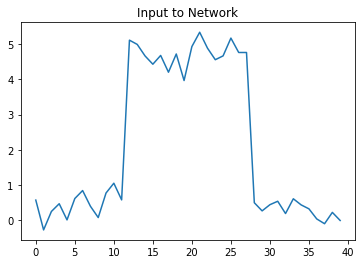

In [ ]:
pyplot.plot(X_train[3,580:620])
pyplot.title('Input to Network')

Text(0.5, 1.0, 'Output of layer 1')

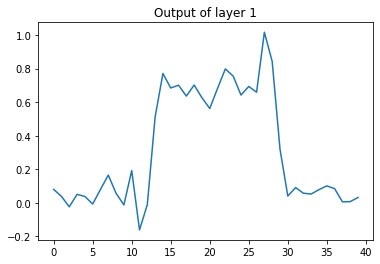

In [ ]:
pyplot.plot(intermediate_output[3,580:620,18])
pyplot.title('Output of layer %i'%(intermediate_layer_index))

In [ ]:
intermediate_layer_index = 7
 
intermediate_layer_model = Model(inputs=model3.input,
                                 outputs=model3.get_layer(index=intermediate_layer_index).output)
 
intermediate_output = intermediate_layer_model.predict(X_train.reshape(shapeX))

Text(0.5, 1.0, 'Output of layer 7')

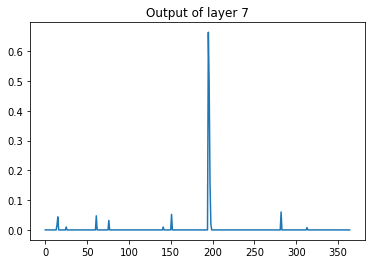

In [ ]:
pyplot.plot(intermediate_output[3,1:366,18])
pyplot.title('Output of layer %i'%(intermediate_layer_index))

In [ ]:
# Measure evaluation speed
t0 = time.time()
model3.evaluate(x = X_val.reshape(shapeX),   y = Y_val,   verbose=False) 
dt = time.time() - t0
print("Evaluation speed: {:.2f} traces/s ".format(len(X_val) /dt))


Evaluation speed: 1807.65 traces/s 


In [ ]:
print(out_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'loss', 'accuracy', 'precision_1', 'recall_1'])


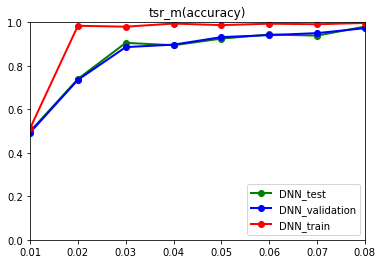

In [ ]:
tsr_m = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
accuracy_DNN2_train = [0.5125, 0.9843, 0.9801, 0.9944, 0.9873, 0.9938, 0.9913, 0.9972]
accuracy_DNN2_validation = [0.4931, 0.7355, 0.8862, 0.8975, 0.9321, 0.9413, 0.9505, 0.9733]
accuracy_DNN2_test = [0.4986, 0.7396, 0.9058, 0.8947, 0.9252, 0.9442, 0.9390, 0.9805]

lines = pyplot.plot(tsr_m, accuracy_DNN2_test, 'g', tsr_m, accuracy_DNN2_validation, 'b', tsr_m, accuracy_DNN2_train, 'r')

pyplot.setp(lines[0], marker='o', linewidth=2, markersize=6)
pyplot.setp(lines[1], marker='o', linewidth=2, markersize=6)
pyplot.setp(lines[2], marker='o', linewidth=2, markersize=6)
pyplot.legend(('DNN_test','DNN_validation','DNN_train'), loc='lower right')

pyplot.title('tsr_m(accuracy)')

axes = pyplot.gca()
axes.set_xlim([0.01, 0.08])
axes.set_ylim([0, 1.00])

pyplot.show()

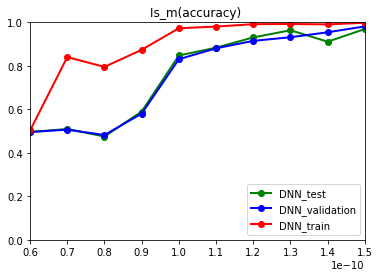

In [ ]:
Is_m = [6e-11, 7e-11, 8e-11, 9e-11, 10e-11, 11e-11, 12e-11, 13e-11, 14e-11, 15e-11]
accuracy_DNN2_train = [0.5028, 0.8403, 0.7952, 0.8738, 0.9731, 0.9806, 0.9917, 0.9926, 0.9906, 0.9981]
accuracy_DNN2_validation = [0.4958, 0.5064, 0.4819, 0.5804, 0.8306, 0.8806, 0.9149, 0.9316, 0.9544, 0.9814]
accuracy_DNN2_test = [0.4958, 0.5097, 0.4749, 0.5900, 0.8476, 0.8836, 0.9307, 0.9637, 0.9111, 0.9695]

lines = pyplot.plot(Is_m, accuracy_DNN2_test, 'g', Is_m, accuracy_DNN2_validation, 'b', Is_m, accuracy_DNN2_train, 'r')

pyplot.setp(lines[0], marker='o', linewidth=2, markersize=6)
pyplot.setp(lines[1], marker='o', linewidth=2, markersize=6)
pyplot.setp(lines[2], marker='o', linewidth=2, markersize=6)
pyplot.legend(('DNN_test','DNN_validation','DNN_train'), loc='lower right')

pyplot.title('Is_m(accuracy) ')

axes = pyplot.gca()
axes.set_xlim([6e-11, 15e-11])
axes.set_ylim([0.00, 1.00])

pyplot.show()

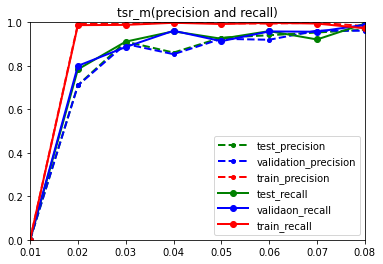

In [ ]:
tsr_m = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
precision_DNN2_train_tsr_m = [0, 0.9926, 0.9922, 1.0, 0.9962, 0.9943, 0.9981, 0.9833]
precision_DNN2_validation_tsr_m = [0, 0.7100, 0.9005, 0.8536, 0.9243, 0.9200, 0.9621, 0.9613]
precision_DNN2_test_tsr_m = [0, 0.7113, 0.9114,0.8611, 0.9297, 0.9408, 0.9534, 0.9663]

recall_DNN2_train_tsr_m = [0, 0.9872, 0.9884, 0.9980, 0.9924, 0.9980, 0.9944, 0.9725]
recall_DNN2_validation_tsr_m= [0, 0.8000, 0.8865, 0.9615, 0.9135, 0.9583, 0.9569, 0.9886]
recall_DNN2_test_tsr_m = [0, 0.7840, 0.9114, 0.9587, 0.9247, 0.9597, 0.9213, 0.9942]

lines = pyplot.plot(tsr_m, precision_DNN2_test_tsr_m, 'g', tsr_m, precision_DNN2_validation_tsr_m, 'b', tsr_m, precision_DNN2_train_tsr_m, 'r',
                    tsr_m, recall_DNN2_test_tsr_m, 'g', tsr_m, recall_DNN2_validation_tsr_m, 'b', tsr_m, recall_DNN2_train_tsr_m, 'r' 

)

pyplot.setp(lines[0], marker='o', linestyle='--', label='test_precision', linewidth=2, markersize=4)
pyplot.setp(lines[1], marker='o', linestyle='--', label='validation_precision', linewidth=2, markersize=4)
pyplot.setp(lines[2], marker='o', linestyle='--', label='train_precision', linewidth=2, markersize=4)
pyplot.legend( loc='lower right',handlelength=5)


pyplot.setp(lines[3], marker='o', linestyle='-', label='test_recall', linewidth=2, markersize=6)
pyplot.setp(lines[4], marker='o', linestyle='-', label='validaon_recall', linewidth=2, markersize=6)
pyplot.setp(lines[5], marker='o', linestyle='-', label='train_recall', linewidth=2, markersize=6)
pyplot.legend( loc='lower right', handlelength=3)

pyplot.title('tsr_m(precision and recall)')

axes = pyplot.gca()
axes.set_xlim([0.01, 0.08])
axes.set_ylim([0, 1.00])

pyplot.show()

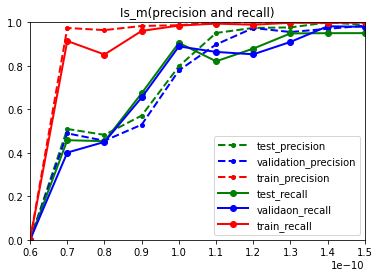

In [ ]:
Is_m = [6e-11, 7e-11, 8e-11, 9e-11, 10e-11, 11e-11, 12e-11, 13e-11, 14e-11, 15e-11]
precision_DNN2_train_Is_m = [0, 0.9742, 0.9644, 0.9834, 0.9870, 0.9998, 0.9998, 0.9998, 0.9998, 0.9998]
precision_DNN2_validation_Is_m = [0, 0.4896, 0.4556, 0.5294, 0.7788, 0.8983, 0.9741, 0.9555, 0.9704, 0.9846]
precision_DNN2_test_Is_m = [0, 0.5097, 0.4825, 0.5714, 0.7979, 0.9512, 0.9745, 0.9767, 0.9998, 0.9885]

recall_DNN2_train_Is_m = [0, 0.9144, 0.8521, 0.9606, 0.9852, 0.9942, 0.9891, 0.9981, 0.9981, 0.9998]
recall_DNN2_validation_Is_m = [0, 0.4011, 0.4502, 0.6545, 0.8894, 0.8641, 0.8531, 0.91005, 0.9820, 0.9795]
recall_DNN2_test_Is_m = [0, 0.4581, 0.4535, 0.6741, 0.9058, 0.8210, 0.8793, 0.9491, 0.9503, 0.9505]

lines = pyplot.plot(Is_m, precision_DNN2_test_Is_m, 'g', Is_m, precision_DNN2_validation_Is_m, 'b', Is_m, precision_DNN2_train_Is_m, 'r',
                    Is_m, recall_DNN2_test_Is_m, 'g', Is_m, recall_DNN2_validation_Is_m, 'b', Is_m, recall_DNN2_train_Is_m, 'r' 

)

pyplot.setp(lines[0], marker='o', linestyle='--', label='test_precision', linewidth=2, markersize=4)
pyplot.setp(lines[1], marker='o', linestyle='--', label='validation_precision', linewidth=2, markersize=4)
pyplot.setp(lines[2], marker='o', linestyle='--', label='train_precision', linewidth=2, markersize=4)
pyplot.legend( loc='lower right',handlelength=5)


pyplot.setp(lines[3], marker='o', linestyle='-', label='test_recall', linewidth=2, markersize=6)
pyplot.setp(lines[4], marker='o', linestyle='-', label='validaon_recall', linewidth=2, markersize=6)
pyplot.setp(lines[5], marker='o', linestyle='-', label='train_recall', linewidth=2, markersize=6)
pyplot.legend( loc='lower right', handlelength=3)

pyplot.title('Is_m(precision and recall)')

axes = pyplot.gca()
axes.set_xlim([6e-11, 15e-11])
axes.set_ylim([0.00, 1.00])

pyplot.show()